In [66]:
#all the libary need
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [67]:
#getting the dataset
dataset=pd.read_csv("/Users/fuadhassan/Desktop/house_price_prediction/bengaluru_house_prices.csv")
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [68]:
dataset.shape

(13320, 9)

In [69]:
dataset.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [70]:
dataset.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [71]:
dataset2=dataset.drop(['area_type','availability','society','balcony'],axis='columns')
dataset2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [72]:
#data cleaning 

dataset2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [73]:
dataset3=dataset2.dropna()
dataset3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [74]:
dataset3.shape

(13246, 5)

In [75]:
dataset3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [76]:
dataset3["bhk"]=dataset3['size'].apply(lambda x: int( x.split(' ')[0]))

/var/folders/mf/yrkcqqr56t955_zz9p9f4swc0000gn/T/ipykernel_31132/1925020407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset3["bhk"]=dataset3['size'].apply(lambda x: int( x.split(' ')[0]))


In [77]:
dataset3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [78]:
dataset3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [79]:
dataset3[dataset3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [80]:
dataset3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [81]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [82]:
dataset3[~dataset3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [83]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [84]:
dataset4 = dataset3.copy()
dataset4.total_sqft = dataset4.total_sqft.apply(convert_sqft_to_num)
dataset4 = dataset4[dataset4.total_sqft.notnull()]
dataset4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [85]:
dataset4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [86]:
dataset5 = dataset4.copy()
dataset5['price_per_sqft'] = dataset5['price']*100000/dataset5['total_sqft']
dataset5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [87]:
len(dataset5.location.unique())

1298

In [88]:
dataset5.location=dataset5.location.apply(lambda x : x.strip())
location_stats = dataset5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [89]:
len(location_stats[location_stats<10])

1033

In [90]:
location_stats_less_than_10 = location_stats[location_stats<10]
location_stats_less_than_10

location
Kaverappa Layout         9
B Narayanapura           9
2nd Phase JP Nagar       9
Banagiri Nagar           9
Chandra Layout           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Kannur                   1
whitefiled               1
Name: location, Length: 1033, dtype: int64

In [91]:
len(dataset['location'].unique())

1306

In [92]:
dataset5.location=dataset.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(dataset5['location'].unique())

296

In [93]:
dataset5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [94]:
dataset5.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920759e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [95]:
dataset5[dataset5.total_sqft/dataset5.bhk<300].head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [96]:
dataset5.shape

(13200, 7)

In [97]:
dataset6=dataset5[~(dataset5.total_sqft/dataset5.bhk<300)]

In [98]:
dataset6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [99]:
def remove_pps_outliers(dataset):
    dataset_out = pd.DataFrame()
    for key, subds in dataset.groupby('location'):
        m = np.mean(subds.price_per_sqft)
        st = np.std(subds.price_per_sqft)
        reduced_df = subds[(subds.price_per_sqft>(m-st)) & (subds.price_per_sqft<=(m+st))]
        dataset_out = pd.concat([dataset_out,reduced_df],ignore_index=True)
    return dataset_out
dataset7 = remove_pps_outliers(dataset6)
dataset7.shape

(10183, 7)

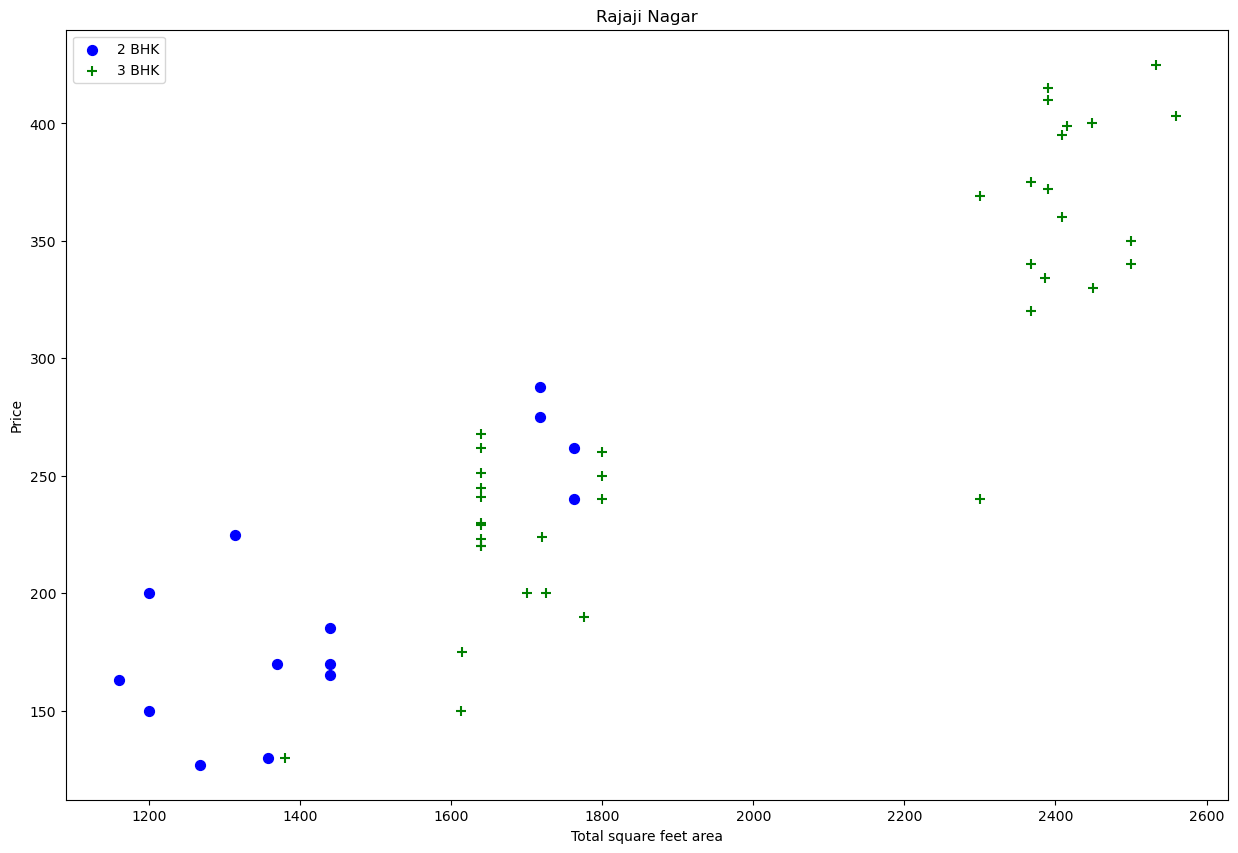

In [100]:
def plot_scatter_chart(dataset,location):
    bhk2=dataset[(dataset.location==location)&(dataset.bhk==2)]
    bhk3=dataset[(dataset.location==location)&(dataset.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='Green',label='3 BHK',s=50)
    plt.xlabel('Total square feet area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()


plot_scatter_chart(dataset7,"Rajaji Nagar")

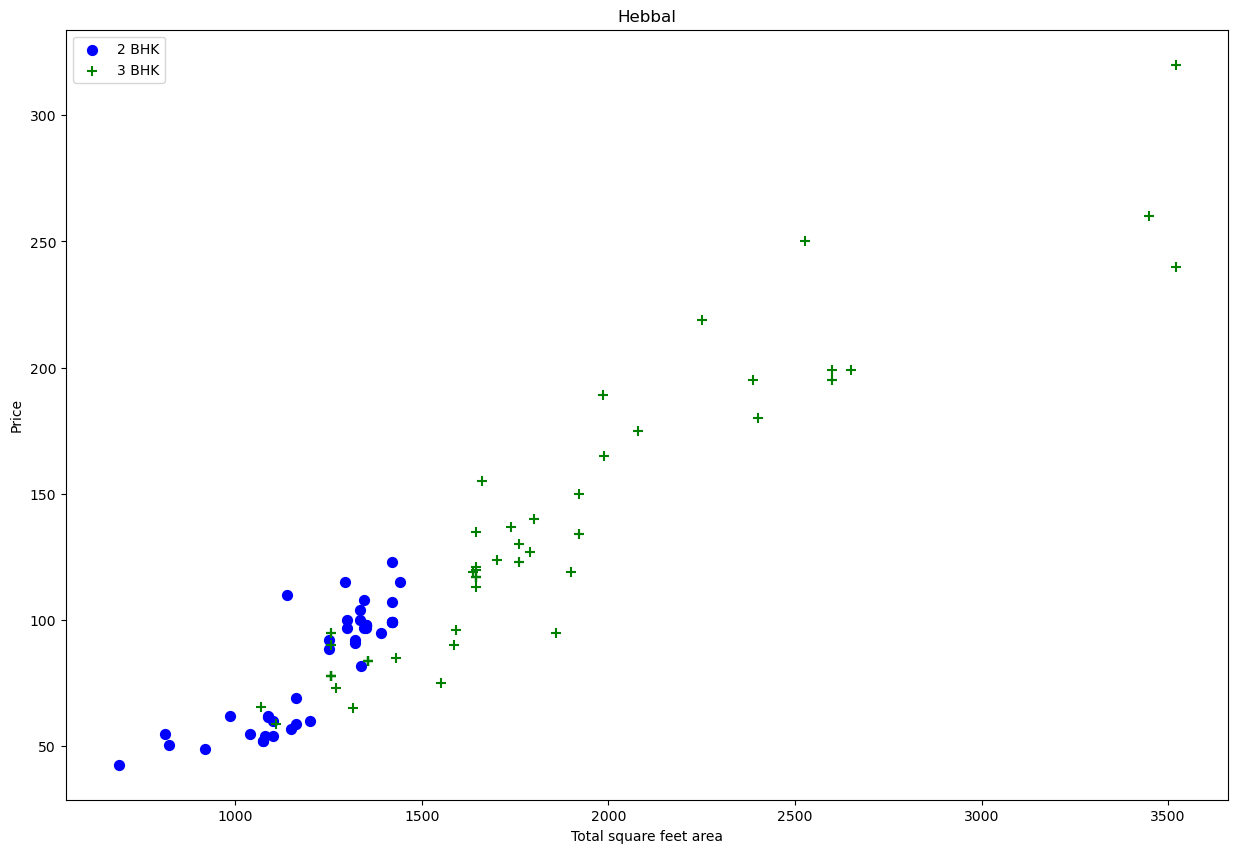

In [101]:
plot_scatter_chart(dataset7,"Hebbal")

In [102]:
def remove_bhk_outliers(dataset):
    exclude_indices = np.array([])
    for location,location_dataset in dataset.groupby('location'):
        bhk_stats={}
        for bhk,bhk_dataset in location_dataset.groupby('bhk'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_dataset.price_per_sqft),
                'std': np.std(bhk_dataset.price_per_sqft),
                'count': bhk_dataset.shape[0]
            }
        for bhk, bhk_dataset in location_dataset.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_dataset[bhk_dataset.price_per_sqft<(stats['mean'])].index.values)
    return dataset.drop(exclude_indices,axis='index')

dataset8 = remove_bhk_outliers(dataset7)
dataset8.shape

(7368, 7)

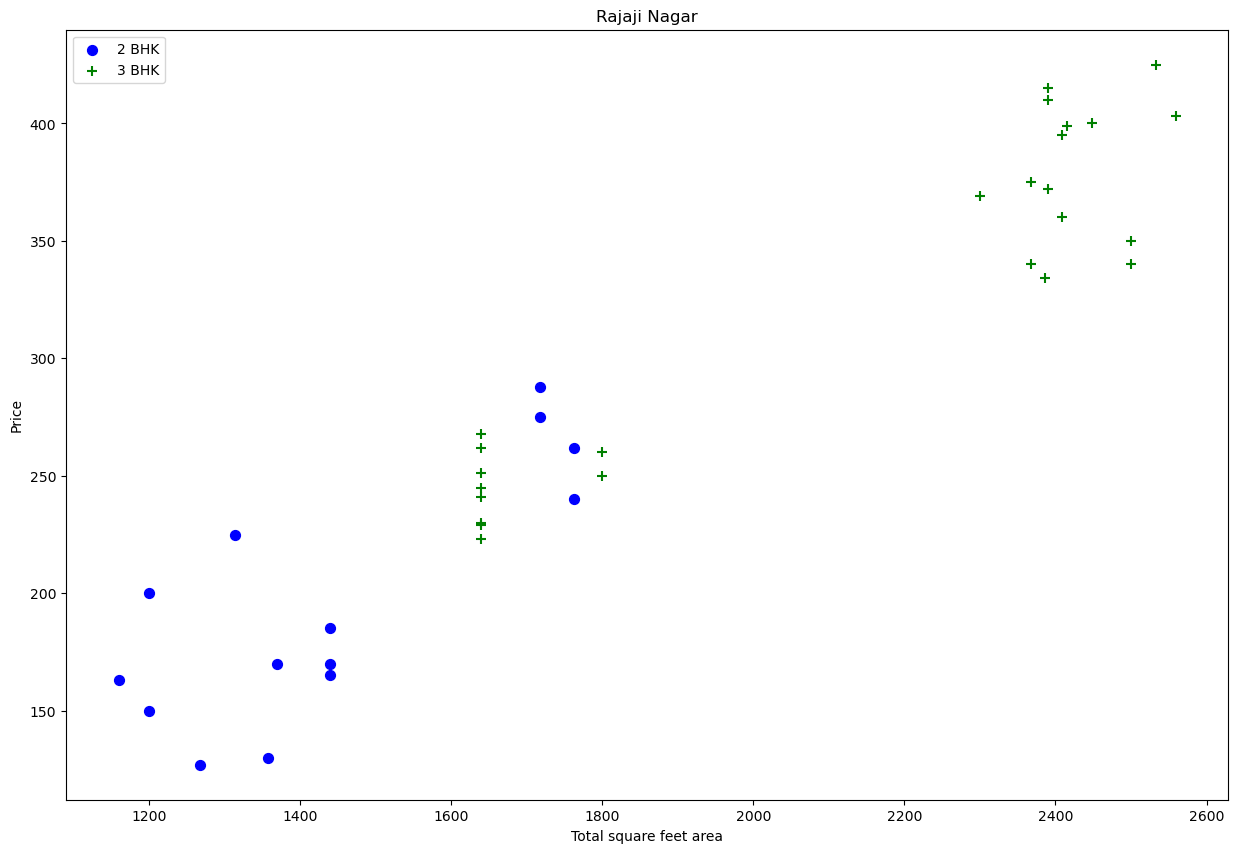

In [103]:
plot_scatter_chart(dataset8,"Rajaji Nagar")

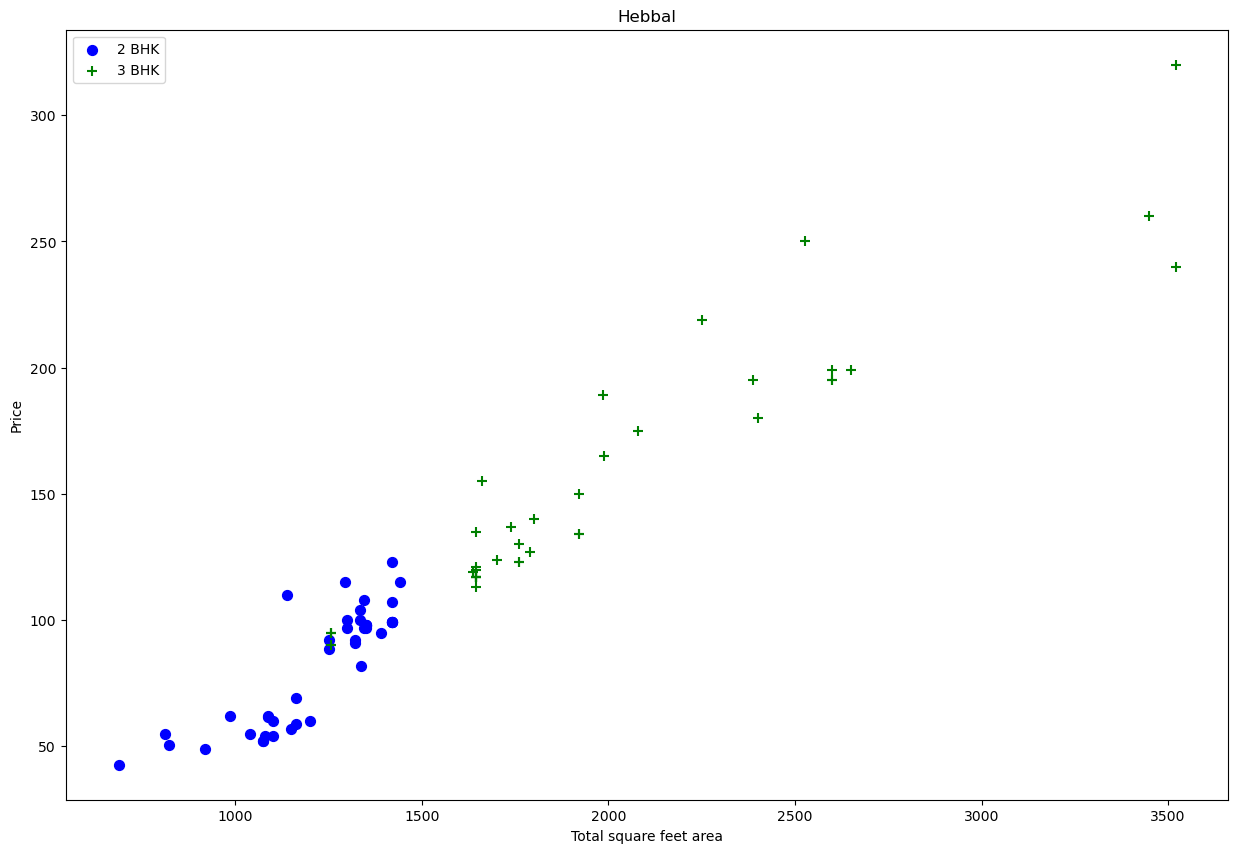

In [104]:
plot_scatter_chart(dataset8,"Hebbal")

Text(0, 0.5, 'count')

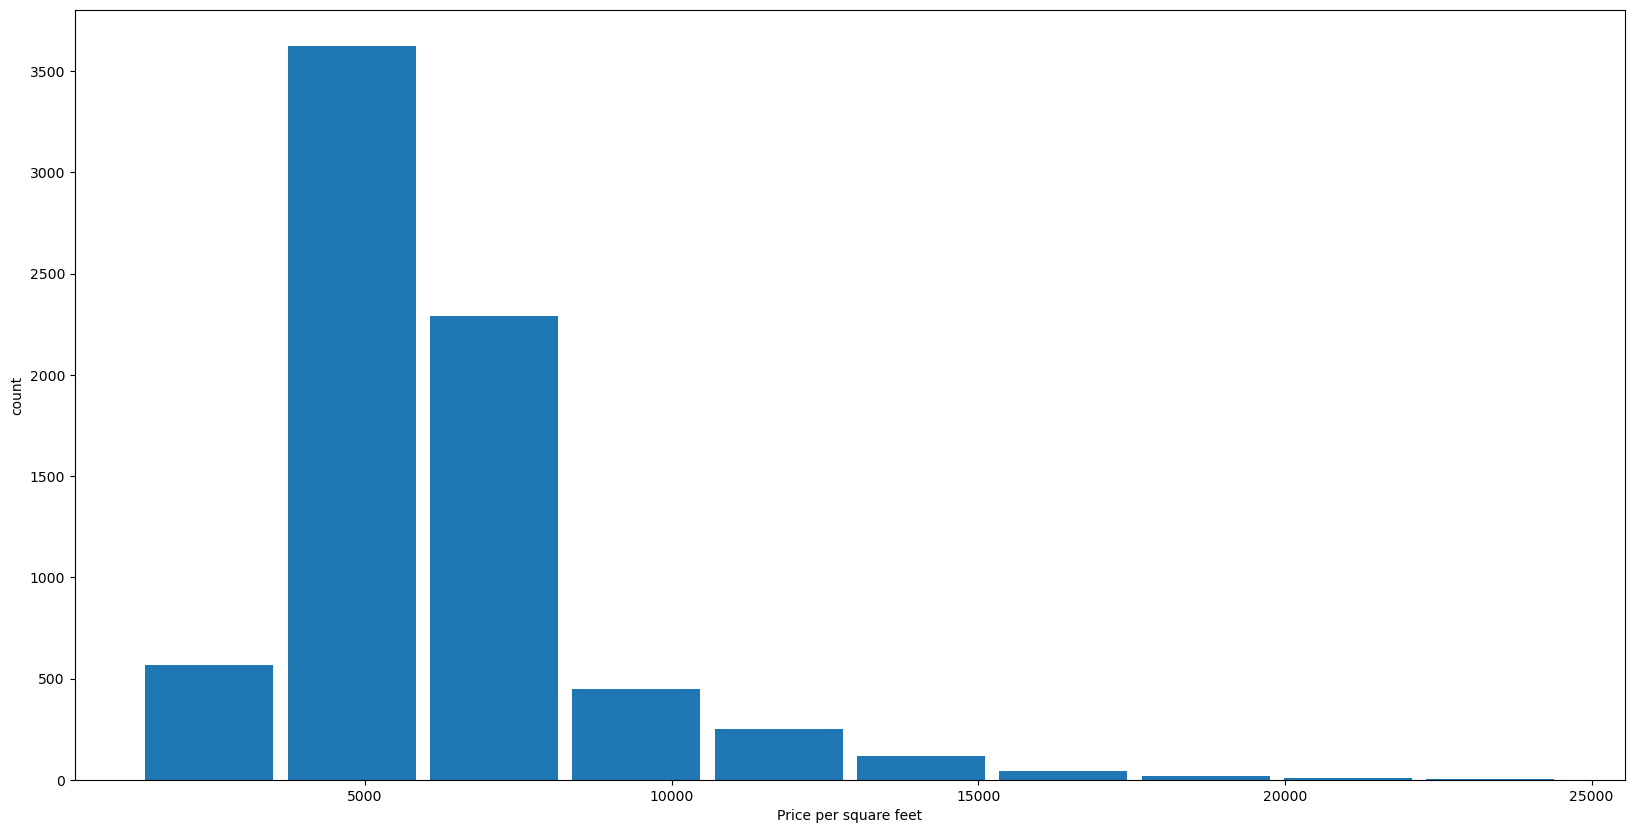

In [105]:
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(dataset8.price_per_sqft,rwidth=.9)
plt.xlabel('Price per square feet')
plt.ylabel('count')

In [106]:
dataset8.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  6., 14.,  7.,  9., 12., 16., 13.])

In [107]:
dataset8[dataset8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
607,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
5359,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8558,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8641,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9318,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9622,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

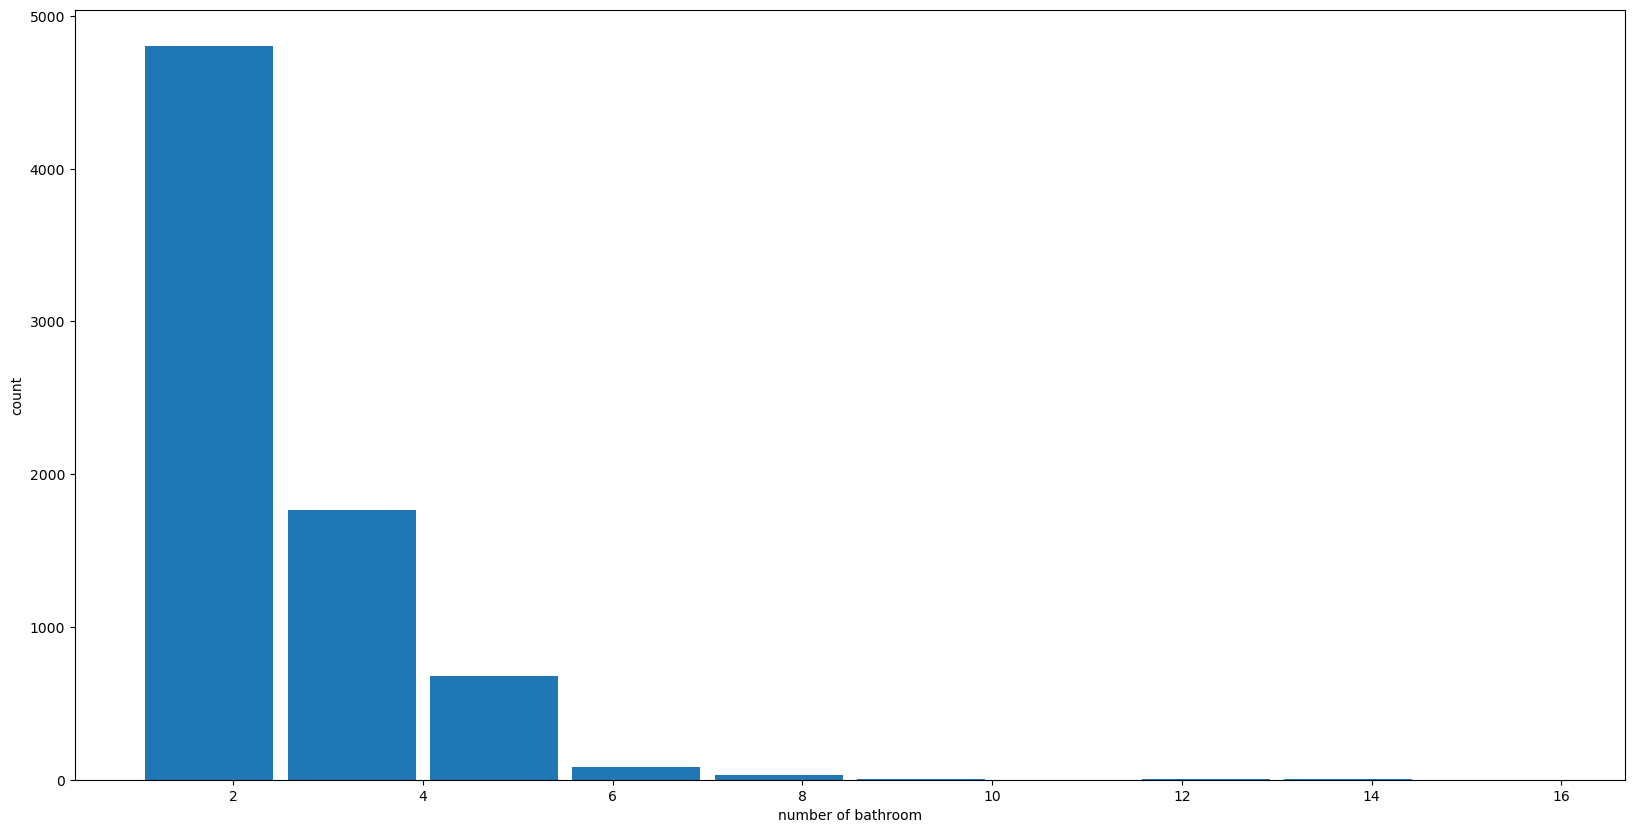

In [108]:
plt.hist(dataset8.bath,rwidth=0.9)
plt.xlabel('number of bathroom')
plt.ylabel('count')

In [109]:
dataset8[dataset8.bath>dataset8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
607,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1663,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5320,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6813,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8492,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [110]:
dataset9=dataset8[dataset8.bath<dataset8.bhk+2]
dataset9.shape


(7290, 7)

In [111]:
dataset10=dataset9.drop(['size','price_per_sqft'],axis='columns')
dataset10

,location,total_sqft,bath,price,bhk
0,Devarabeesana Halli,1672.0,3.0,150.0,3
1,Devarabeesana Halli,1750.0,3.0,149.0,3
2,Devarabeesana Halli,1750.0,3.0,150.0,3
4,Devarachikkanahalli,1250.0,2.0,40.0,2
5,Devarachikkanahalli,1200.0,2.0,83.0,2
...,...,...,...,...,...
10174,other,1200.0,2.0,70.0,2
10175,other,1800.0,1.0,200.0,1
10178,other,1353.0,2.0,110.0,2
10179,other,812.0,1.0,26.0,1


In [112]:
dummies = pd.get_dummies(dataset10.location)
dummies.head()

,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
dataset11=pd.concat([dataset10,dummies.drop('other',axis='columns')],axis='columns')
dataset11

,location,total_sqft,bath,price,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarabeesana Halli,1672.0,3.0,150.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarabeesana Halli,1750.0,3.0,149.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarabeesana Halli,1750.0,3.0,150.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1250.0,2.0,40.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,1200.0,2.0,83.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10174,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10175,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10178,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10179,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
dataset11.to_csv('ex.csv')

In [115]:
dataset12=dataset11.drop('location',axis='columns')
dataset12

,total_sqft,bath,price,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1672.0,3.0,150.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,149.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,150.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,40.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1200.0,2.0,83.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10174,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10175,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10178,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10179,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
dataset12.shape

(7290, 276)

In [117]:
X = dataset12.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1672.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1200.0,2.0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
Y = dataset12.price
Y.head()

0    150.0
1    149.0
2    150.0
4     40.0
5     83.0
Name: price, dtype: float64

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [120]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8159450258627781

In [121]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([-1.17965390e+16, -1.31964603e+14, -5.37945757e+15,  8.52441584e-01,
       -1.20718815e+15])

In [122]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'copy_X': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, Y)


/Users/fuadhassan/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fuadhassan/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fuadhassan/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/Users/fuadhassan/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/Users/fua

,model,best_score,best_params
0,linear_regression,0.781858,"{'copy_X': True, 'fit_intercept': True, 'posit..."
1,lasso,0.674363,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.692206,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [123]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [124]:
predict_price('1st Phase JP Nagar',1000, 2, 2)


/Users/fuadhassan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.39571999362

In [125]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

/Users/fuadhassan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.3196708533418

In [126]:
predict_price('Indira Nagar',1000, 2, 2)

/Users/fuadhassan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


194.55428941991642

In [127]:
predict_price('Indira Nagar',1000, 3, 3)

/Users/fuadhassan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


196.47824027963821

In [128]:
import pickle
with open('house_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [129]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))